<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding g via a Simple Pendulum #
data gathered by:
 ## Dominic Darrigo and Annie Campbell ##

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:

# Define the file path
file_path = r'C:\\Users\\Dominic\\Downloads\\trial 1\\Raw Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the DataFrame to include only the data between 0.5 seconds and 20.36 seconds
df_trimmed = df[(df['Time (s)'] > 0.5) & (df['Time (s)'] <= 20.36)]

#length of the simple pendulum
L= .8477 #meters
df_trimmed['Velocity x (m/s)'] = df_trimmed['Rotation x (rad/s)'] * L
df_trimmed['Velocity y (m/s)'] = df_trimmed['Rotation y (rad/s)'] * L
df_trimmed['Velocity z (m/s)'] = df_trimmed['Rotation z (rad/s)'] * L
# These functions are multiplied  by L under the rolling condition to convert angular velocity to linear velocity




C:\Users\Dominic\AppData\Local\Temp\ipykernel_4384\2303067454.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Velocity x (m/s)'] = df_trimmed['Rotation x (rad/s)'] * L
C:\Users\Dominic\AppData\Local\Temp\ipykernel_4384\2303067454.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Velocity y (m/s)'] = df_trimmed['Rotation y (rad/s)'] * L
C:\Users\Dominic\AppData\Local\Temp\ipykernel_4384\2303067454.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

## Curve Fitting ##

In [ ]:
# Define the sine and cosine functions for curve fitting
def sin_func(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

def cos_func(t, A, omega, phi):
    return A * np.cos(omega * t + phi)

"""these create the sine and cosine functions for curve fitting
inputs:
    t: time values
    A: amplitude
    omega: angular frequency
    phi: phase
outputs:
    A * np.sin(omega * t + phi): the sine function
    A * np.cos(omega * t + phi): the cosine function"""

def calculate_residuals(params, t, data, func):
    A, omega, phi = params
    return np.sum((data - func(t, A, omega, phi))**2)
"""This function calculates the sum of squared residuals to identify the best fit parameters for the sine and cosine functions
inputs:
    params: the parameters for the sine or cosine function
    t: time values
    data: the velocity data
    func: the sine or cosine function"""
omega_guesses = np.linspace(0.1, 10, 100)

# Fit the curves to the sine function and find the best fit based on the deviation from the data
time = df_trimmed['Time (s)']
best_fit_params_x = None
best_fit_params_y = None
best_fit_params_z = None
best_fit_params_net = None
min_residuals_x = float('inf')
min_residuals_y = float('inf')
min_residuals_z = float('inf')
min_residuals_net = float('inf')

for omega_guess in omega_guesses:
    try:
        popt_x, pcov_x = curve_fit(sin_func, time, df_trimmed['Velocity x (m/s)'], p0=[1, omega_guess, 0])
        residuals_x = calculate_residuals(popt_x, time, df_trimmed['Velocity x (m/s)'], sin_func)
        if residuals_x < min_residuals_x:
            min_residuals_x = residuals_x
            best_fit_params_x = popt_x
            best_fit_pcov_x = pcov_x

        popt_y, pcov_y = curve_fit(sin_func, time, df_trimmed['Velocity y (m/s)'], p0=[1, omega_guess, 0])
        residuals_y = calculate_residuals(popt_y, time, df_trimmed['Velocity y (m/s)'], sin_func)
        if residuals_y < min_residuals_y:
            min_residuals_y = residuals_y
            best_fit_params_y = popt_y
            best_fit_pcov_y = pcov_y

        popt_z, pcov_z = curve_fit(sin_func, time, df_trimmed['Velocity z (m/s)'], p0=[1, omega_guess, 0])
        residuals_z = calculate_residuals(popt_z, time, df_trimmed['Velocity z (m/s)'], sin_func)
        if residuals_z < min_residuals_z:
            min_residuals_z = residuals_z
            best_fit_params_z = popt_z
            best_fit_pcov_z = pcov_z
    except RuntimeError:
        # Ignore the cases where the curve fitting fails
        continue


"""This for loop find the best paratmters to fit the x,y,and z velocity functions to a the sin function V=Asin(wt+phi)
omega ranges from 0.1 to 10

inputs:
    omega_guess: a list of guesses for omega
    time: the time values
    df_trimmed['Velocity x (m/s)']: the x velocity values
    df_trimmed['Velocity y (m/s)']: the y velocity values
    df_trimmed['Velocity z (m/s)']: the z velocity values

 Outputs:
    best_fit_params_x: the best fit parameters for the x velocity
    best_fit_params_y: the best fit parameters for the y velocity
    best_fit_params_z: the best fit parameters for the z velocity
    best_fit_params_net: the best fit parameters for the net velocity
    min_residuals_x: the minimum residuals for the x velocity
    min_residuals_y: the minimum residuals for the y velocity
    min_residuals_z: the minimum residuals for the z velocity
"""
perr_x = np.sqrt(np.diag(best_fit_pcov_x))
perr_y = np.sqrt(np.diag(best_fit_pcov_y))
perr_z = np.sqrt(np.diag(best_fit_pcov_z))

"""
These lines calculate the standard deviation of the parameters for the x, y, and z velocity functions
inputs:
    best_fit_pcov_x: the covariance matrix for the x velocity
    best_fit_pcov_y: the covariance matrix for the y velocity
    best_fit_pcov_z: the covariance matrix for the z velocity
outputs:
    perr_x: the standard deviation of the parameters for the x velocity
    perr_y: the standard deviation of the parameters for the y velocity
    perr_z: the standard deviation of the parameters for the z velocity
"""

'\nThese lines calculate the standard deviation of the parameters for the x, y, and z velocity functions\ninputs:\n    best_fit_pcov_x: the covariance matrix for the x velocity\n    best_fit_pcov_y: the covariance matrix for the y velocity\n    best_fit_pcov_z: the covariance matrix for the z velocity\noutputs:    \n    perr_x: the standard deviation of the parameters for the x velocity\n    perr_y: the standard deviation of the parameters for the y velocity\n    perr_z: the standard deviation of the parameters for the z velocity\n'

## Plotting Velocities ##

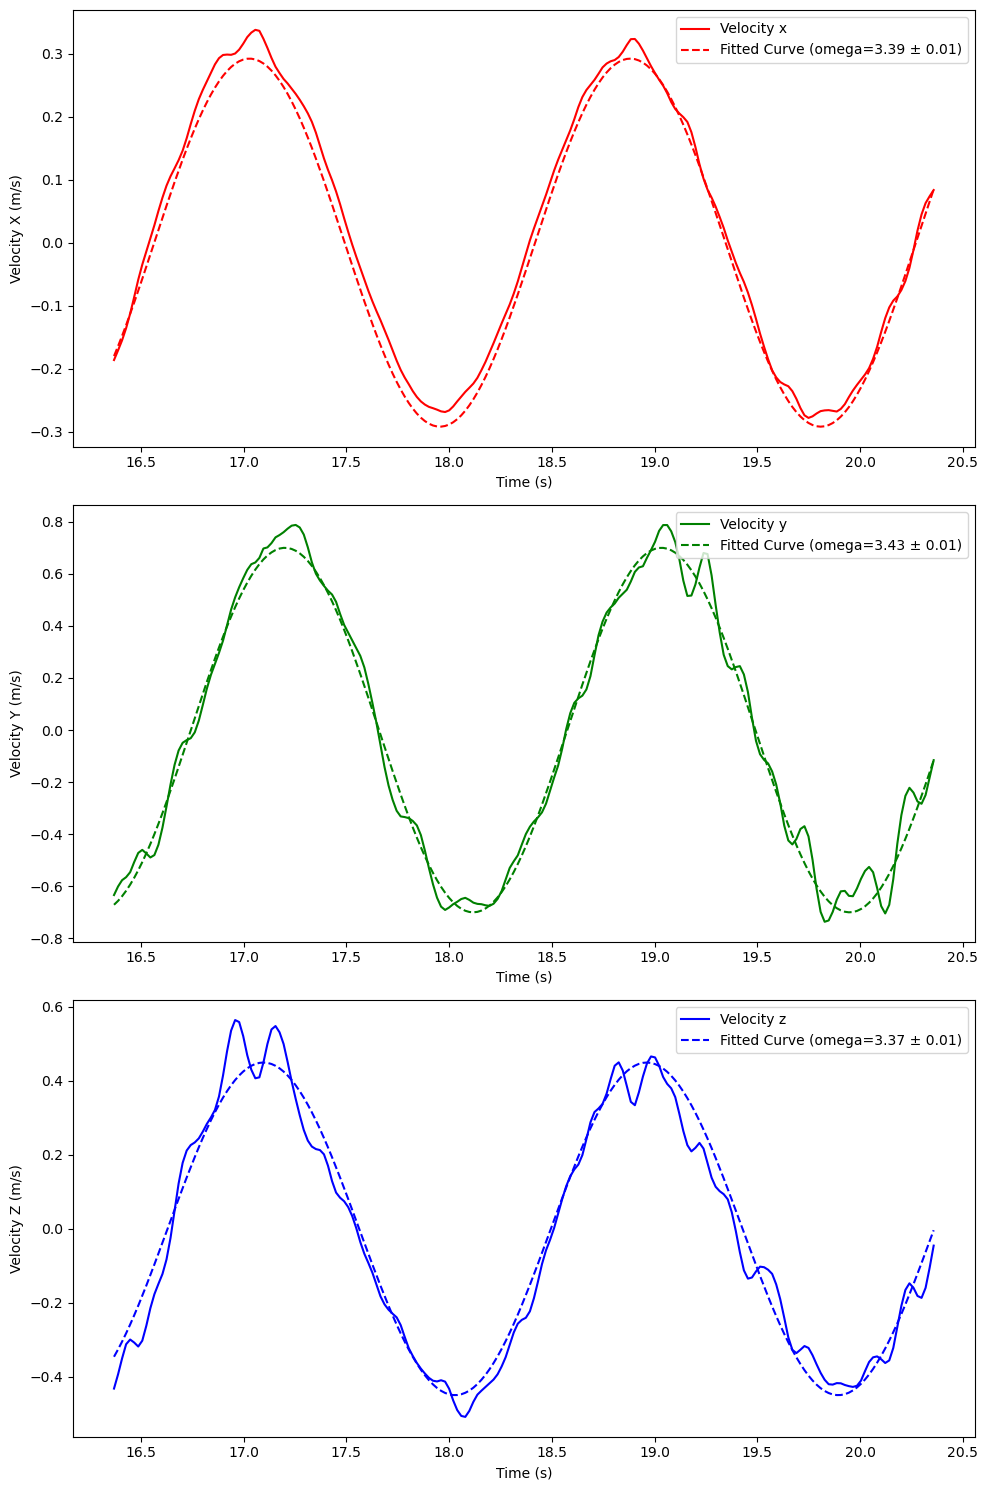

In [ ]:

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the x-axis velocity and fitted curve
axs[0].plot(time, df_trimmed['Velocity x (m/s)'], color='r', label='Velocity x')
axs[0].plot(time, sin_func(time, *best_fit_params_x), 'r--', label=f'Fitted Curve (omega={best_fit_params_x[1]:.2f} ± {perr_x[1]:.2f})')
axs[0].set_ylabel('Velocity X (m/s)')
axs[0].set_xlabel('Time (s)')
axs[0].legend()

# Plot the y-axis velocity and fitted curve
axs[1].plot(time, df_trimmed['Velocity y (m/s)'], color='g', label='Velocity y')
axs[1].plot(time, sin_func(time, *best_fit_params_y), 'g--', label=f'Fitted Curve (omega={best_fit_params_y[1]:.2f} ± {perr_y[1]:.2f})')
axs[1].set_ylabel('Velocity Y (m/s)')
axs[1].set_xlabel('Time (s)')
axs[1].legend()

# Plot the z-axis velocity and fitted curve
axs[2].plot(time, df_trimmed['Velocity z (m/s)'], color='b', label='Velocity z')
axs[2].plot(time, sin_func(time, *best_fit_params_z), 'b--', label=f'Fitted Curve (omega={best_fit_params_z[1]:.2f} ± {perr_z[1]:.2f})')
axs[2].set_ylabel('Velocity Z (m/s)')
axs[2].set_xlabel('Time (s)')
axs[2].legend()

plt.tight_layout()

plt.show()

## Finding g Based on Period of Oscillation ##

In [ ]:
T=2*np.pi/best_fit_params_z[1]
g=L*(2*np.pi/T)**2
print("the value for g is",g)

"""We can assume the system behaves like a simple pendulum if we isolate the behavior of in the z-axis.
The period of the pendulum is given by T=2pi/w where w is the angular frequency.
The acceleration due to gravity is given by g=L(w^2).
We can use the period of the pendulum, found by our best fit curves above, to calculate value of g."""

the value for g is 9.617625592376694


'We can assume the system behaves like a simple pendulum if we isolate the behavior of in the z-axis. \nThe period of the pendulum is given by T=2pi/w where w is the angular frequency. \nThe acceleration due to gravity is given by g=L(w^2).\nWe can use the period of the pendulum, found by our best fit curves above, to calculate value of g.'

## Sources of Error ##

In [ ]:
#Since we are only looking in the Z direction for gravity, since it only has components in the z direction, we will isolate the errors within this direction only
perr_z = np.sqrt(np.diag(best_fit_pcov_z))
#This generates an array of which the second entry is the deviation of the angular frequency
#The systemic error from the Phyphox app is negligible when compared to the error from the curve fitting.

err_g=2*L*best_fit_params_z[1]*perr_z[2]
err_g=round(err_g,2)
#Using the standard deviation of the angular frequency, we can calculate the error in g
g=round(g,2)
print("g=",g,"±",err_g)


g= 9.62 ± 1.05


The expected value for g is within the error of the experimentally obtained value, although that dose not say much given the massive error in g. This error comes from the large deviation in the angular frequency, but also has many other possible contributors:
* The string holding the phone was actually a leather belt, which was neither uniform or remained rigid. (The former being more impactful than the later as the deformations were too small to visibly notice)
* The system was not perfectly anchored to the ground and thus could swing itself, effecting the behavior of the pendulum


The frequency of the oscillation varied heavily as a result of all the factors above and more that are not immediately apparent and would require further testing.
One possible way to improve the data gathered by the system would be to take a fourier transform of the waveform and analyze the primary wave only, perhaps with the next 2 waves in the series as error correction.   